# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [54]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import nltk as nltk
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import dataframe_image as dfi

%matplotlib inline

print('NLP Homework Assignment')
print('------------------------')
print('In this assignment, you will apply natural language processing to understand the sentiment in the latest news articles') 
print('featuring Bitcoin and Ethereum. You will also apply fundamental NLP techniques to better understand the other factors') 
print('involved with the coin prices such as common words and phrases and organizations and entities mentioned in the articles.')

NLP Homework Assignment
------------------------
In this assignment, you will apply natural language processing to understand the sentiment in the latest news articles
featuring Bitcoin and Ethereum. You will also apply fundamental NLP techniques to better understand the other factors
involved with the coin prices such as common words and phrases and organizations and entities mentioned in the articles.


In [108]:
# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [109]:
# Create a newsapi client
api_key = os.getenv("NEWS_API_KEY")
newsapi = NewsApiClient(api_key=api_key)

In [110]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]
print('There are {"totalResults"} Bitcoin news articles in the English media.')

There are {"totalResults"} Bitcoin news articles in the English media.


In [107]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]
print('There are {"totalResults"} Ethereum news articles in the English media')

There are {"totalResults"} Ethereum news articles in the English media


In [59]:
# Function to create a dataframe for Bitcoin news in English
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError as ae:
            pass

    return pd.DataFrame(articles)

In [60]:
 # Create a DataFrame with Bitcoin news
bitcoin_df = create_df(bitcoin_news_en["articles"], "en")
bitcoin_df.head()

,title,description,text,date,language
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en


In [61]:
# Save bitcoin dataframe to CSV
file_path = (".\dataframe_csv/bitcoin_news.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [62]:
# Create a DataFrame with Ethereum news
ethereum_df = create_df(ethereum_news_en["articles"], "en")
ethereum_df.head()

,title,description,text,date,language
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en


In [63]:
# Save Ethereum dataframe to CSV
file_path = (".\dataframe_csv/ethereum_news.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [64]:
# Concatenate dataframes
crypto_df = pd.concat([bitcoin_df, ethereum_df])
crypto_df.head()

,title,description,text,date,language
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en


In [65]:
# Save combined dataframe to CSV
file_path = ("./dataframe_csv\crypto_news.csv")
crypto_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [66]:
# Create the Ethereum sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [67]:
# Sentiment scores dictionaries (Ethereum)
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Ethereum news dataframe
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df = ethereum_df.join(title_sentiment_df).join(text_sentiment_df)

# Inspect new dataframe 
ethereum_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en,-0.2023,0.000,0.795,0.205,-1,-0.2280,0.072,0.831,0.097,-1
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en,0.0000,0.000,1.000,0.000,0,-0.1154,0.116,0.730,0.154,-1
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en,0.0000,0.000,1.000,0.000,0,-0.7713,0.000,0.831,0.169,-1


In [68]:
# Save ethereum dataframe to CSV
file_path = (".\dataframe_csv/eth_sentiment.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [69]:
# Save ETH sentiment dataframe as JPEG
dfi.export(ethereum_df, './images\ethereum_df.jpg')

In [70]:
# Sentiment scores dictionaries (Bitcoin)
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Ethereum news dataframe
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df = bitcoin_df.join(title_sentiment_df).join(text_sentiment_df)

# Inspect new dataframe 
bitcoin_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en,-0.2023,0.000,0.795,0.205,-1,-0.2280,0.072,0.831,0.097,-1
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en,0.0000,0.000,1.000,0.000,0,-0.1154,0.116,0.730,0.154,-1
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en,0.0000,0.000,1.000,0.000,0,-0.7713,0.000,0.831,0.169,-1


In [71]:
# Save BTH sentiment dataframe as CSV
file_path = (".\dataframe_csv/bitcoin_sentiment.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [72]:
# Save btc sentiment df as JPEG
dfi.export(bitcoin_df, '.\images/bitcoin_df.jpg')

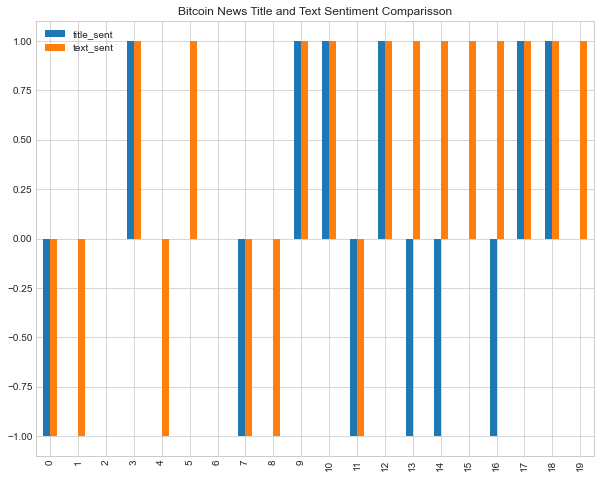

In [73]:
# Describe the Bitcoin Sentiment
bitcoin_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Bitcoin News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

# Save plot as JPEG
plt.savefig("bitcoin_sentiment.jpeg")

In [74]:
# Describe bitcoin dataframe
bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.037865,0.081450,0.804300,0.114200,0.000000,0.142255,0.077450,0.878350,0.044300,0.300000
std,0.274041,0.105278,0.179119,0.144186,0.794719,0.412751,0.049525,0.071554,0.062683,0.923381
min,-0.599400,0.000000,0.515000,0.000000,-1.000000,-0.771300,0.000000,0.730000,0.000000,-1.000000
25%,-0.108475,0.000000,0.615000,0.000000,-1.000000,-0.118550,0.053250,0.843750,0.000000,-1.000000
50%,0.000000,0.000000,0.796000,0.000000,0.000000,0.318200,0.085000,0.870500,0.000000,1.000000
75%,0.165400,0.213750,1.000000,0.211500,1.000000,0.458800,0.107000,0.922250,0.061750,1.000000
max,0.401900,0.247000,1.000000,0.438000,1.000000,0.636900,0.171000,1.000000,0.187000,1.000000


<AxesSubplot:title={'center':'Ethereum News Title and Text Sentiment Comparisson'}>

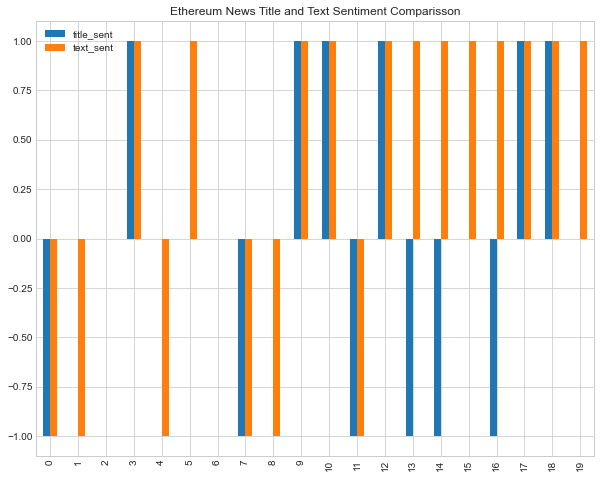

In [75]:
# Describe the Ethereum Sentiment
ethereum_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Ethereum News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [76]:
# Save plot as JPEG
plt.savefig(".\images/ethereum_sentiment.jpg")

<Figure size 432x288 with 0 Axes>

In [77]:
# Describe the Ethereum dataframe
ethereum_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.037865,0.081450,0.804300,0.114200,0.000000,0.142255,0.077450,0.878350,0.044300,0.300000
std,0.274041,0.105278,0.179119,0.144186,0.794719,0.412751,0.049525,0.071554,0.062683,0.923381
min,-0.599400,0.000000,0.515000,0.000000,-1.000000,-0.771300,0.000000,0.730000,0.000000,-1.000000
25%,-0.108475,0.000000,0.615000,0.000000,-1.000000,-0.118550,0.053250,0.843750,0.000000,-1.000000
50%,0.000000,0.000000,0.796000,0.000000,0.000000,0.318200,0.085000,0.870500,0.000000,1.000000
75%,0.165400,0.213750,1.000000,0.211500,1.000000,0.458800,0.107000,0.922250,0.061750,1.000000
max,0.401900,0.247000,1.000000,0.438000,1.000000,0.636900,0.171000,1.000000,0.187000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [78]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import reuters, stopwords
from string import punctuation
import re

In [79]:
# Instantiate the lemmatizer (Bitcoin)
lemmatizer = WordNetLemmatizer()
article = bitcoin_df
print(article)

                                                title  \
0   Ex-Party Producer Charged in $2.7 Million Bitc...   
1   Everyone Has Crypto FOMO, but Does It Belong i...   
2   If you’re a Russian YouTuber, how do you get p...   
3   El Salvador turns to Binance for help on bitco...   
4                          Why Isn't Bitcoin Booming?   
5   Cryptoverse: Remember when bitcoin was 'anonym...   
6   Cryptoverse: Bitcoin gains conflict currency c...   
7   War Is Calling Crypto’s ‘Neutrality’ Into Ques...   
8   Cryptocurrency Donations Pour Into Ukraine. Th...   
9   Is the US Developing a Digital Dollar? This We...   
10  Bitcoin and Ether Are Helping Fund Ukraine's R...   
11    Cryptocurrencies in a time of war - Reuters.com   
12  El Salvador postpones bitcoin bond issue, expe...   
13  Cryptoverse: Bitcoin's scared of commitment, M...   
14  U.S. company devises method to use coal waste ...   
15  Bitcoin climbs to highest in almost three week...   
16  LIVE MARKETS Bitcoin, not e

In [80]:
# Instantiate the lemmatizer (Bitcoin)
lemmatizer = WordNetLemmatizer()
article = ethereum_df
print(article)

                                                title  \
0   Ex-Party Producer Charged in $2.7 Million Bitc...   
1   Everyone Has Crypto FOMO, but Does It Belong i...   
2   If you’re a Russian YouTuber, how do you get p...   
3   El Salvador turns to Binance for help on bitco...   
4                          Why Isn't Bitcoin Booming?   
5   Cryptoverse: Remember when bitcoin was 'anonym...   
6   Cryptoverse: Bitcoin gains conflict currency c...   
7   War Is Calling Crypto’s ‘Neutrality’ Into Ques...   
8   Cryptocurrency Donations Pour Into Ukraine. Th...   
9   Is the US Developing a Digital Dollar? This We...   
10  Bitcoin and Ether Are Helping Fund Ukraine's R...   
11    Cryptocurrencies in a time of war - Reuters.com   
12  El Salvador postpones bitcoin bond issue, expe...   
13  Cryptoverse: Bitcoin's scared of commitment, M...   
14  U.S. company devises method to use coal waste ...   
15  Bitcoin climbs to highest in almost three week...   
16  LIVE MARKETS Bitcoin, not e

In [81]:
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = { "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", 
              "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", 
              "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", 
              "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", 
              "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", 
              "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", 
              "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", 
              "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", 
              "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", 
              "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", 
              "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", 
              "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", 
              "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", 
              "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", 
              "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", 
              "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", 
              "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", 
              "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", 
              "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", 
              "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", 
              "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", 
              "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", 
              "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", 
              "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", 
              "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", 
              "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", 
              "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", 
              "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", 
              "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", 
              "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", 
              "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", 
              "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", 
              "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", 
              "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", 
              "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", 
              "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", 
              "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", 
              "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", 
              "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", 
              "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", 
              "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", 
              "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", 
              "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", 
              "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", 
              "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", 
              "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"}
stop = set(list(sw)+list(sw_addons))

In [82]:
# Define function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [83]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    ## Define and apply the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]

    return tokens

In [84]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en,-0.2023,0.000,0.795,0.205,-1,-0.2280,0.072,0.831,0.097,-1,"[Mr., Spiekers, prominent, customer, whale, cl..."
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en,0.0000,0.000,1.000,0.000,0,-0.1154,0.116,0.730,0.154,-1,"[fund, vehicle, hold, crypto, directly, grappl..."
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[Russia, invaded, Ukraine, Niki, Proshin, year..."
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1,"[SAN, SALVADOR, March, 23, Reuters, Salvador, ..."
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en,0.0000,0.000,1.000,0.000,0,-0.7713,0.000,0.831,0.169,-1,"[``, Bitcoin, libertarian-leaning, fan, kind, ..."


In [85]:
# Save dataframe to CSV
file_path = (".\dataframe_csv/btc_with_token_column.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [86]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Ex-Party Producer Charged in $2.7 Million Bitc...,Thomas Spieker’s clients included dark-web dru...,"Mr. Spiekers most prominent customer, whom he ...",2022-03-24,en,-0.2023,0.000,0.795,0.205,-1,-0.2280,0.072,0.831,0.097,-1,"[Mr., Spiekers, prominent, customer, whale, cl..."
1,"Everyone Has Crypto FOMO, but Does It Belong i...",A growing array of investment options make it ...,"Other fund vehicles hold crypto directly, but ...",2022-03-24,en,0.0000,0.000,1.000,0.000,0,-0.1154,0.116,0.730,0.154,-1,"[fund, vehicle, hold, crypto, directly, grappl..."
2,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[Russia, invaded, Ukraine, Niki, Proshin, year..."
3,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,en,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1,"[SAN, SALVADOR, March, 23, Reuters, Salvador, ..."
4,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en,0.0000,0.000,1.000,0.000,0,-0.7713,0.000,0.831,0.169,-1,"[``, Bitcoin, libertarian-leaning, fan, kind, ..."


In [87]:
# Save dataframe to CSV
file_path = (".\dataframe_csv/eth_with_token_column.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [88]:
from collections import Counter
from nltk import ngrams

In [89]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('March', '22'), 4),
 (('22', 'Reuters'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (('char', 'SAN'), 3),
 (('SAN', 'SALVADOR'), 3),
 (('SALVADOR', 'March'), 3),
 (('Reuters', 'Salvador'), 3),
 (('char', 'March'), 3),
 (('Russia', "'s"), 3),
 (('Russia', 'invaded'), 2),
 (('invaded', 'Ukraine'), 2),
 (("'s", 'invasion'), 2),
 (('invasion', 'Ukraine'), 2),
 (('Getty', 'Nonfungible'), 2),
 (('Nonfungible', 'Tidbits'), 2),
 (('char', 'LONDON'), 2),
 (('LONDON', 'March'), 2),
 (('Salvador', 'postponed'), 2),
 (('postponed', 'unprecedented'), 2),
 (('unprecedented', 'issue'), 2)]

In [90]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('March', '22'), 4),
 (('22', 'Reuters'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (('char', 'SAN'), 3),
 (('SAN', 'SALVADOR'), 3),
 (('SALVADOR', 'March'), 3),
 (('Reuters', 'Salvador'), 3),
 (('char', 'March'), 3),
 (('Russia', "'s"), 3),
 (('Russia', 'invaded'), 2),
 (('invaded', 'Ukraine'), 2),
 (("'s", 'invasion'), 2),
 (('invasion', 'Ukraine'), 2),
 (('Getty', 'Nonfungible'), 2),
 (('Nonfungible', 'Tidbits'), 2),
 (('char', 'LONDON'), 2),
 (('LONDON', 'March'), 2),
 (('Salvador', 'postponed'), 2),
 (('postponed', 'unprecedented'), 2),
 (('unprecedented', 'issue'), 2)]

In [91]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [92]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(btc_tokens, N = 10)

[('char', 20),
 ('Reuters', 10),
 ('Bitcoin', 9),
 ('March', 9),
 ('crypto', 7),
 ('Russia', 7),
 ('Ukraine', 6),
 ('week', 6),
 ('bitcoin', 5),
 ('…', 5)]

In [93]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(eth_tokens, N = 10)

[('char', 20),
 ('Reuters', 10),
 ('Bitcoin', 9),
 ('March', 9),
 ('crypto', 7),
 ('Russia', 7),
 ('Ukraine', 6),
 ('week', 6),
 ('bitcoin', 5),
 ('…', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

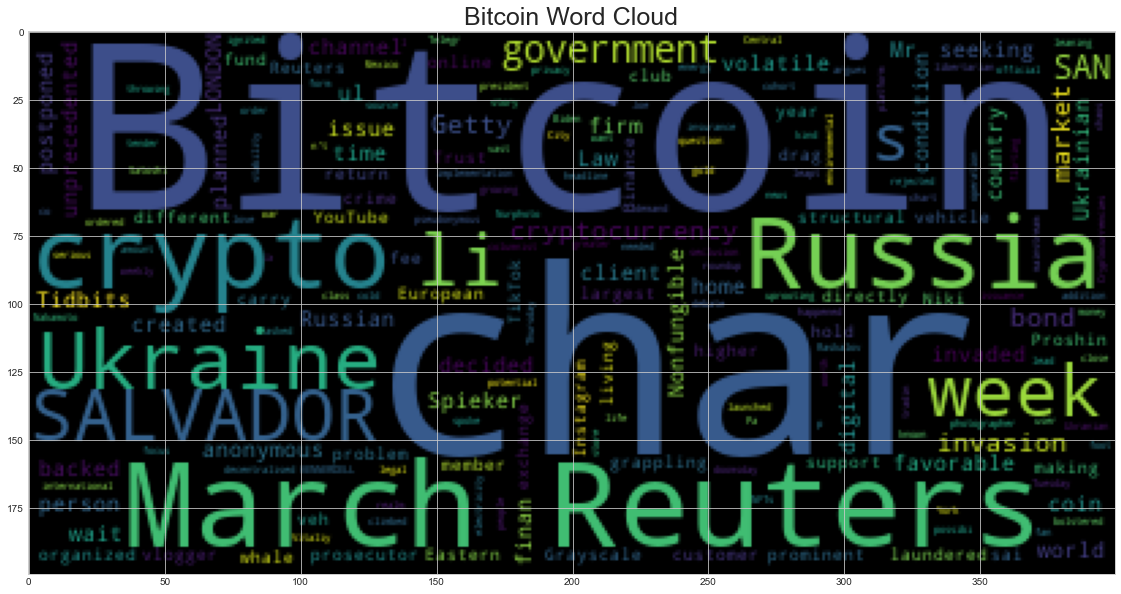

In [95]:
# Generate the Bitcoin word cloud
word_cloud = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(word_cloud)
plt.title("Bitcoin Word Cloud", fontdict={'fontsize':25})

# Save as jpeg
plt.savefig(".\images/btc_cloud.jpg")

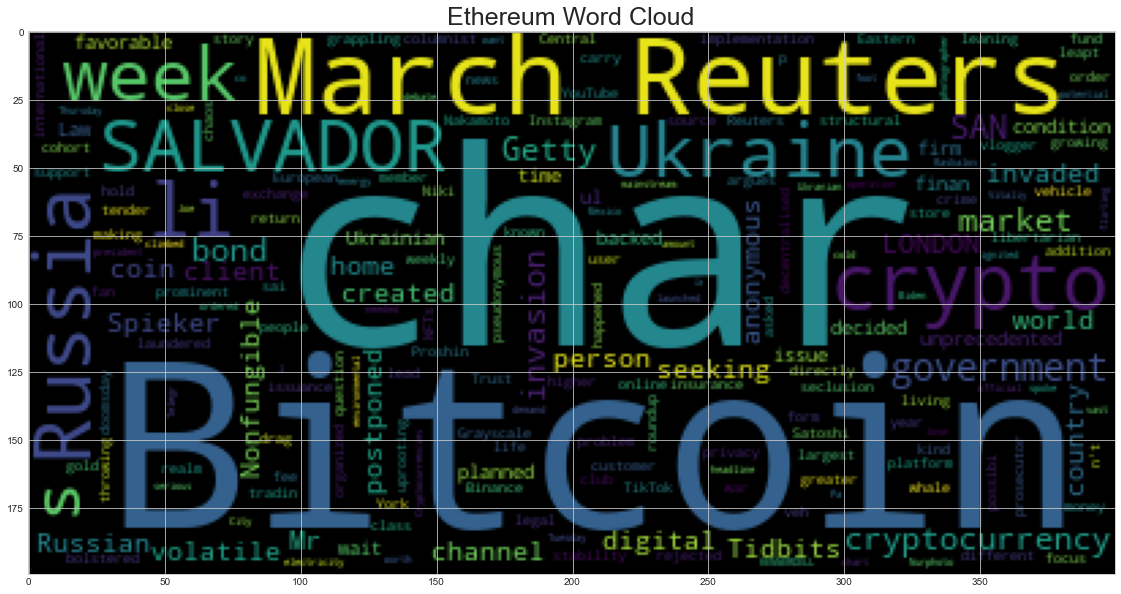

In [96]:
# Generate the Ethereum word cloud
word_cloud = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(word_cloud)
plt.title("Ethereum Word Cloud", fontdict={'fontsize':25})

# Save as jpeg
plt.savefig(".\images/eth_cloud.jpg")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [97]:
import spacy
from spacy import displacy

In [98]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [99]:
# Concatenate all of the Bitcoin text together
bitcoin_NER = bitcoin_df["text"].str.cat()

In [100]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_NER)

# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [101]:
# Render the visualization
displacy.render(doc, style='ent')

In [102]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
22 CARDINAL
Reuters ORG
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
+3275 ORG
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
Reuters ORG
U.S. GPE
Joe Biden PERSON
chars]KENNERDELL ORG
Pa. GPE
March 21 DATE
Reuters ORG
March 22 DATE
Reuters ORG
Tuesday DATE
almost three weeks DATE
Russia GPE
Ukraine GPE
Reuters ORG
BITCOIN PERSON
March 22

---

### Ethereum NER

In [103]:
# Concatenate all of the Ethereum text together
ethereum_NER = ethereum_df["text"].str.cat()

In [104]:
# Run the NER processor on all of the text
doc = nlp(ethereum_NER)

# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [105]:
# Render the visualization
displacy.render(doc, style='ent')

In [106]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
22 CARDINAL
Reuters ORG
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
+3275 ORG
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
Reuters ORG
U.S. GPE
Joe Biden PERSON
chars]KENNERDELL ORG
Pa. GPE
March 21 DATE
Reuters ORG
March 22 DATE
Reuters ORG
Tuesday DATE
almost three weeks DATE
Russia GPE
Ukraine GPE
Reuters ORG
BITCOIN PERSON
March 22

---